<a href="https://colab.research.google.com/github/omergunal23/KNN_Algortihm/blob/main/KNN_WineDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1- Loading the dataset and visualizing some features

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/winedata.csv', header = None)
# I added feature names to first row as header since the actual dataset doesn't have
df.columns = ['class', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280-OD315_of_diluted_wines', 'Proline']
df.to_csv("winedata_w_headers.csv", index=False)
df[0:5]
# 5 samples features for all type of classes

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df[59:64]

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450
62,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420


In [ ]:
df[130:135]

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
130,3,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630
131,3,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530
132,3,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560
133,3,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600
134,3,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650


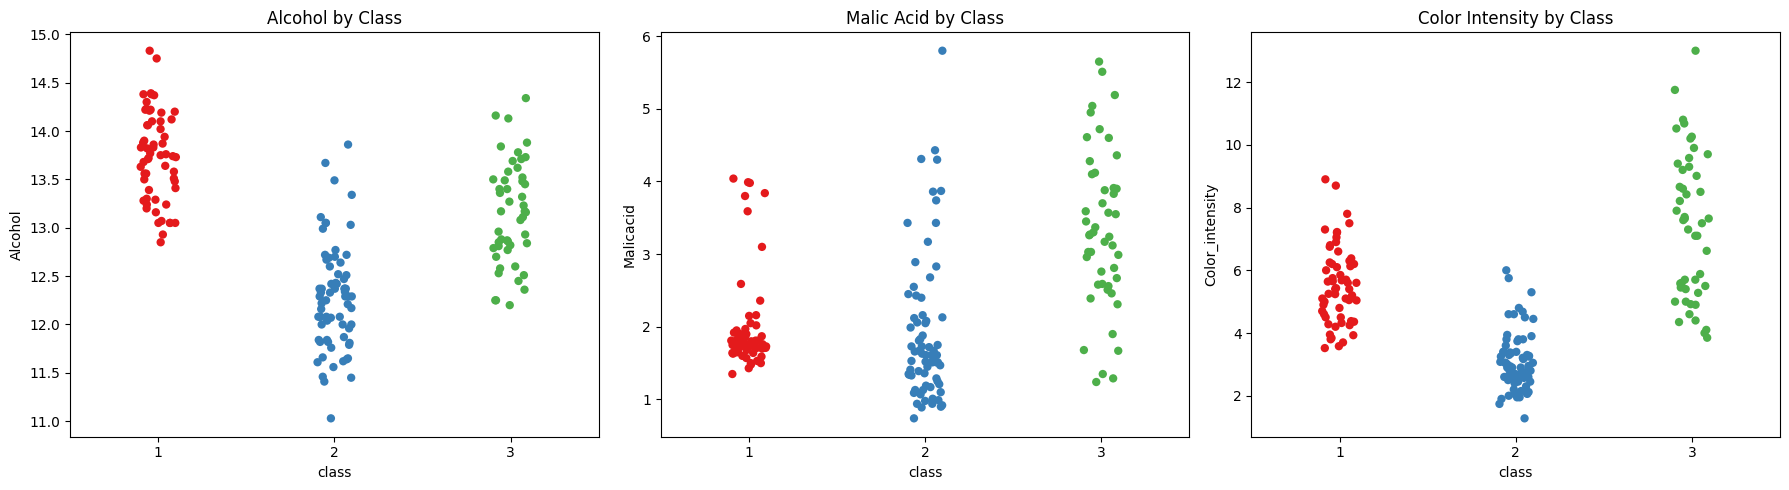

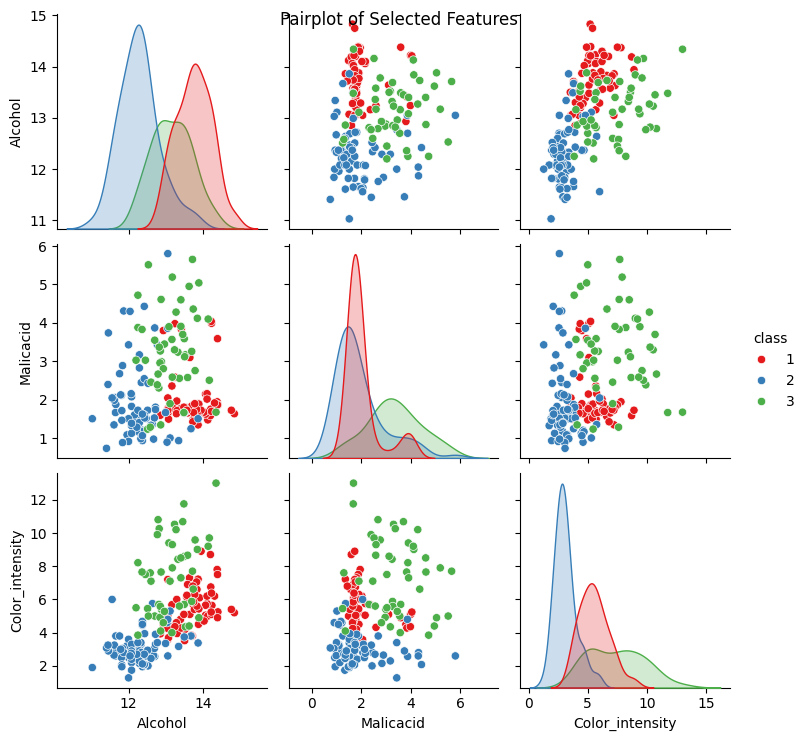

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.stripplot(data=df, x='class', y='Alcohol', hue='class', palette='Set1', jitter=True, size=6, legend=False)
plt.title("Alcohol by Class")
plt.xlabel("class")
plt.ylabel("Alcohol")

plt.subplot(1, 3, 2)
sns.stripplot(data=df, x='class', y='Malicacid', hue='class', palette='Set1', jitter=True, size=6, legend=False)
plt.title("Malic Acid by Class")
plt.xlabel("class")
plt.ylabel("Malicacid")

plt.subplot(1, 3, 3)
sns.stripplot(data=df, x='class', y='Color_intensity', hue='class', palette='Set1', jitter=True, size=6, legend=False)
plt.title("Color Intensity by Class")
plt.xlabel("class")
plt.ylabel("Color_intensity")

plt.tight_layout()
plt.show()

selected_features = ['Alcohol', 'Malicacid', 'Color_intensity', 'class']
sns.pairplot(df[selected_features], hue='class', palette='Set1')
plt.suptitle("Pairplot of Selected Features")
plt.show()

2- Data Preprocessing

In [ ]:
df.duplicated().any() # check if there is any duplicated values in the dataset

np.False_

In [ ]:
df['class'].value_counts() # number of data points in each class

,count
class,
2,71
1,59
3,48


            class     Alcohol   Malicacid         Ash  Alcalinity_of_ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total_phenols  Flavanoids  Nonflavanoid_phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000   

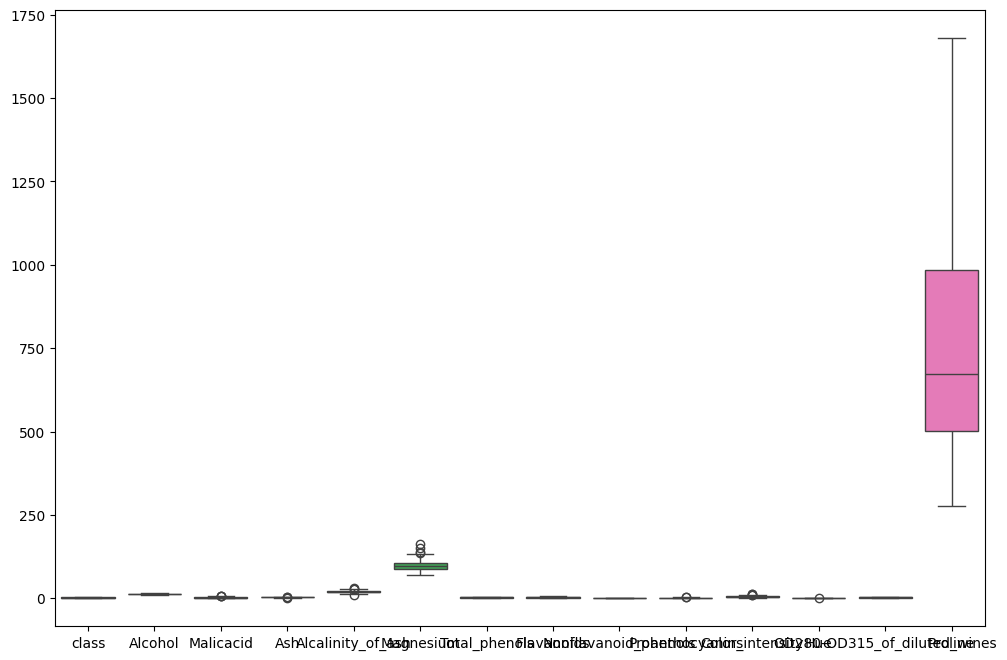

In [ ]:
print(df.describe(include = 'all')) # informations about the dataset
plt.figure(figsize=(12, 8))
ax = sns.boxplot(df)
# It is obvious that the dataset needs to be normalized

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1) # except output class
y = df['class'].values
# Only normalize features (X), not labels (y) -> classification
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # 80% train, 20% test with shuffle

print("Actual data:", df.shape)
print("Train data:", X_train.shape)
print("Test data:", X_test.shape)

[[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.66403162 0.73796791 ... 0.10569106 0.12087912 0.20114123]]
Actual data: (178, 14)
Train data: (142, 13)
Test data: (36, 13)


3- KNN Algorithm on dataset

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

# For KNN algo: when a new test data comes, its distance is calculated with the train dataset which is in the memory
def knn_predict(X_train, y_train, X_test, k, distance_metric):
    distances = []
    for i, x_train in enumerate(X_train):
        if distance_metric == 'Euclidean':
            distance = euclidean_distance(X_test, x_train)
        elif distance_metric == 'Manhattan':
            distance = manhattan_distance(X_test, x_train)

        distances.append((distance, y_train[i])) # Test data point-Train data points distances with train datas classes to choose the kth nearest among them

    # Select the nearest k-neighbour
    distances.sort(key=lambda x: x[0])
    k_neighbors = []
    for i in range(k):
        distance, label = distances[i]
        k_neighbors.append(label)

    # Most one among the k-neighbour
    return max(k_neighbors, key=k_neighbors.count)

In [ ]:
from sklearn.metrics import accuracy_score

# comparing actual classes with the predicted classes
def evaluate_knn(X_train, y_train, X_test, y_test, k, distance_metric):
    predictions = []
    for x_test in X_test:
        y_pred = knn_predict(X_train, y_train, x_test, k, distance_metric)
        predictions.append(y_pred)

    accuracy = accuracy_score(y_test, predictions)
    return accuracy, predictions

In [ ]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15] # Odd numbers for K value
results = {'K': [], 'Metric': [], 'Accuracy': []}

for metric in ['Euclidean', 'Manhattan']:
    for k in k_values:
        acc, y_pred = evaluate_knn(X_train, y_train, X_test, y_test, k, metric)
        results['K'].append(k)
        results['Metric'].append(metric)
        results['Accuracy'].append(acc)

# Show as dataframe
results_df = pd.DataFrame(results)
print(results_df)

     K     Metric  Accuracy
0    1  Euclidean  0.944444
1    3  Euclidean  0.944444
2    5  Euclidean  0.944444
3    7  Euclidean  0.944444
4    9  Euclidean  0.972222
5   11  Euclidean  0.944444
6   13  Euclidean  0.972222
7   15  Euclidean  0.972222
8    1  Manhattan  0.916667
9    3  Manhattan  0.944444
10   5  Manhattan  0.944444
11   7  Manhattan  0.944444
12   9  Manhattan  0.972222
13  11  Manhattan  0.944444
14  13  Manhattan  0.972222
15  15  Manhattan  0.944444


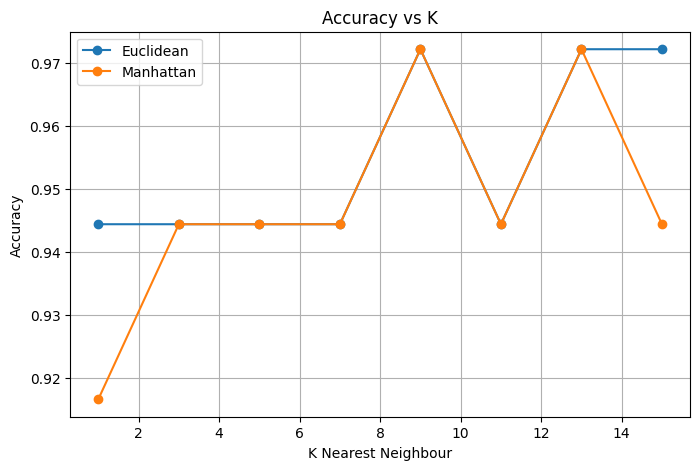

In [ ]:
# Visalization of Accuracy vs K
plt.figure(figsize=(8, 5))
for metric in ['Euclidean', 'Manhattan']:
    plt.plot(
        results_df[results_df['Metric'] == metric]['K'],
        results_df[results_df['Metric'] == metric]['Accuracy'],
        marker='o',
        label=metric
    )

plt.title("Accuracy vs K")
plt.xlabel("K Nearest Neighbour")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


 K = 9 _ Euclidean 
Confusion Matrix:


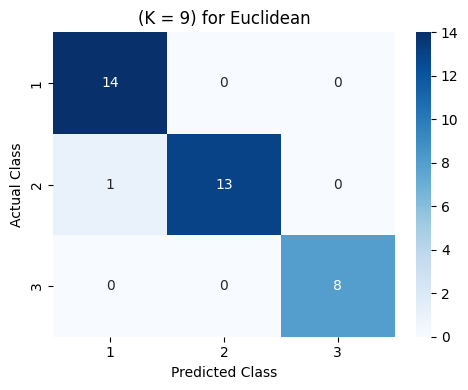

Classification Report:
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36


 K = 9 _ Manhattan 
Confusion Matrix:


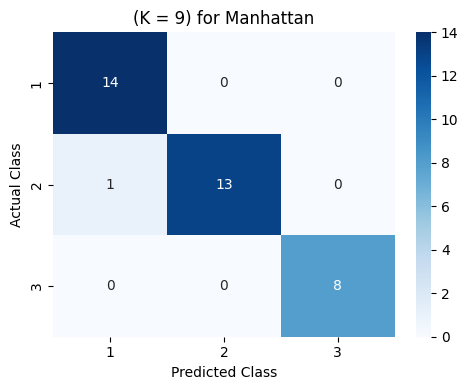

Classification Report:
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36


 K = 13 _ Euclidean 
Confusion Matrix:


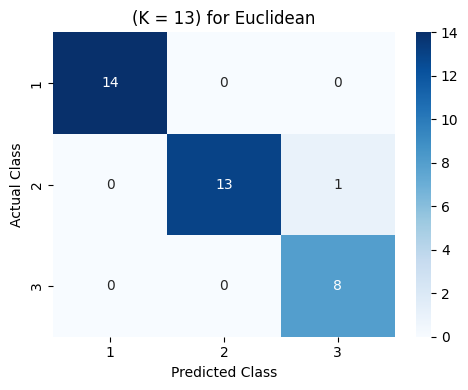

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.93      0.96        14
           3       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36


 K = 13 _ Manhattan 
Confusion Matrix:


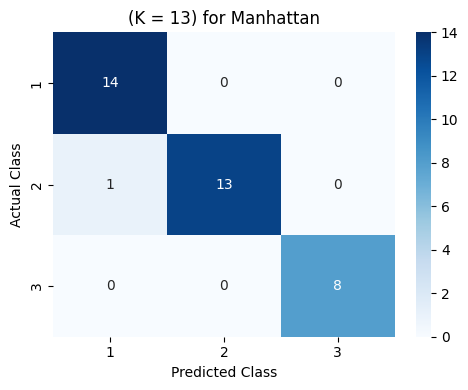

Classification Report:
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Since both K=9, 13 gives the same best result we can compare them by using confusion_matrix, classification_report
k_values = [9, 13]
for k in k_values:
    for metric in ['Euclidean', 'Manhattan']:
        print(f"\n K = {k} _ {metric} ")

        # Prediction Values
        _, y_pred = evaluate_knn(X_train, y_train, X_test, y_test, k, metric)
        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)

        print("Confusion Matrix:")
        # Heatmap ile görselleştir
        plt.figure(figsize=(5, 4))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                    xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
        plt.xlabel("Predicted Class")
        plt.ylabel("Actual Class")
        plt.title(f"(K = {k}) for {metric}")
        plt.tight_layout()
        plt.show()

        print("Classification Report:")
        print(classification_report(y_test, y_pred, target_names=['1', '2', '3']))

I also added Cross Validation code to see if different train-test split scenarios effects the accuracy significantly.

Cross-Validation Results:
    K  Mean Accuracy
0   1       0.943968
1   3       0.949524
2   5       0.955238
3   7       0.977619
4   9       0.949524
5  11       0.960635
6  13       0.954921
7  15       0.960476


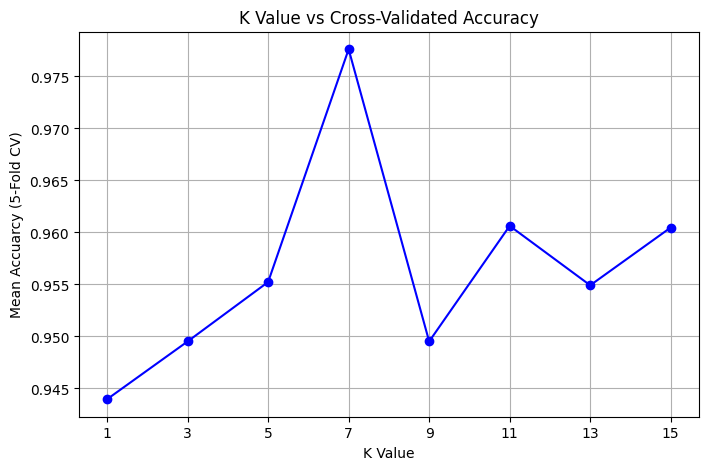

In [ ]:
from sklearn.model_selection import cross_val_score

k_values = [1, 3, 5, 7, 9, 11, 13, 15]
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean') # distance metric can be changed
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')  # 5-fold CV
    cv_scores.append(scores.mean())

results_df = pd.DataFrame({'K': k_values, 'Mean Accuracy': cv_scores})
print("Cross-Validation Results:")
print(results_df)

plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='blue')
plt.title("K Value vs Cross-Validated Accuracy")
plt.xlabel("K Value")
plt.ylabel("Mean Accuarcy (5-Fold CV)")
plt.grid(True)
plt.xticks(k_values)
plt.show()